In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Read the data
df = pd.read_csv('Reviews.csv', nrows=500)
# Look at the top 5 rows of the data
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [3]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [4]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [5]:
# Import libraries

from nltk.corpus import stopwords

from textblob import TextBlob

from textblob import Word
# Lower casing and removing punctuations

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['Text'] = df['Text'].str.replace('[^\w\s]',' ')

# Removal of stop words

stop = stopwords.words('english')

df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Spelling correction

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

# Lemmatization

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.Text.head()


C:\Users\gangi\AppData\Local\Temp\ipykernel_2100\3946619943.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]',' ')


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanut p...
2    connection around century light pillow city ge...
3    looking secret ingredient robitussin believe f...
4    great staff great price wide assortment mummy ...
Name: Text, dtype: object

In [7]:
# Import libraries
from nltk.corpus import stopwords

from textblob import TextBlob

from textblob import Word
# Lower casing and removing punctuations

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['Text'] = df['Text'].str.replace('[^\w\s]',' ')

# Removal of stop words

stop = stopwords.words('english')

df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Spelling correction

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

# Lemmatization

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.Text.head()

C:\Users\gangi\AppData\Local\Temp\ipykernel_22024\157026080.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]',' ')


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanut p...
2    connection around century light pillow city ge...
3    looking secret ingredient robitussin believe f...
4    great staff great price wide assortment mummy ...
Name: Text, dtype: object

In [6]:
!pip install stopwords

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install Textblob

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


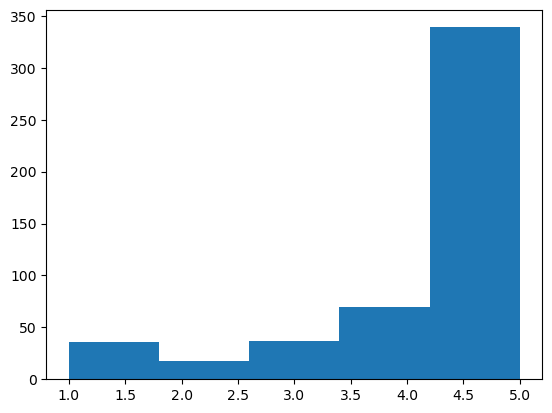

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [9]:
# Create a new data frame “reviews” to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True) 
# The histogram reveals this dataset is highly unbalanced towards high rating. 
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [8]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18)

score_2 = reviews[reviews['Score'] == 2].sample(n=18)

score_3 = reviews[reviews['Score'] == 3].sample(n=18)

score_4 = reviews[reviews['Score'] == 4].sample(n=18)

score_5 = reviews[reviews['Score'] == 5].sample(n=18)

NameError: name 'reviews' is not defined

In [ ]:
# Here we recreate a 'balanced' dataset.

reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)

reviews_sample.reset_index(drop=True,inplace=True)
# Printing count by 'Score' to check dataset is now balanced.
print(reviews_sample.groupby('Score').count().Id)

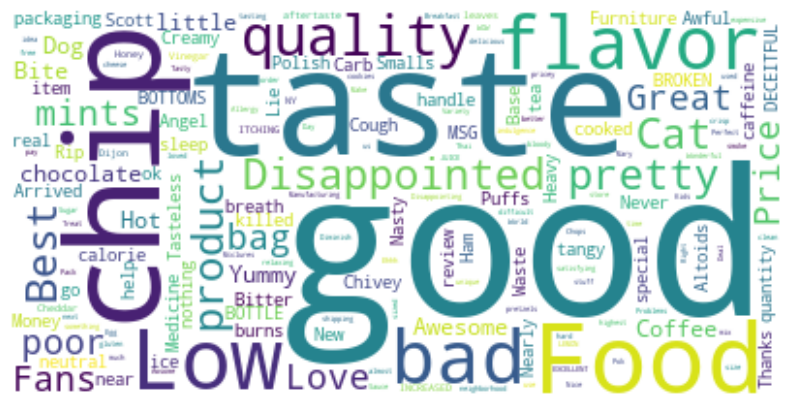

In [16]:
# Let's build a word cloud looking at the 'Summary'  text

from wordcloud import WordCloud
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
#reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)

plt.figure(figsize=(10,10))

plt.imshow(wordcloud,interpolation='bilinear')

plt.axis("off")

plt.show()

In [11]:
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [6]:
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white') \
   .generate(negative_reviews_str)

wordcloud_positive = WordCloud(background_color='white') \
   .generate(positive_reviews_str)

# Plot

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)

ax1.imshow(wordcloud_negative,interpolation='bilinear')

ax1.axis("off")

ax1.set_title('Reviews with Negative Scores',fontsize=20)

ax2 = fig.add_subplot(212)

ax2.imshow(wordcloud_positive,interpolation='bilinear')

ax2.axis("off")

ax2.set_title('Reviews with Positive Scores',fontsize=20)

plt.show()


NameError: name 'WordCloud' is not defined

In [14]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --------- ------------------------------ 30.7/126.0 kB ? eta -:--:--
   ------------------------- ------------- 81.9/126.0 kB 770.8 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 925.7 kB/s eta 0:00:00


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [1]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
# Generating sentiment for all the sentence present in the dataset

emptyline=[]

for row in df['Text']:

    vs=analyzer.polarity_scores(row)

    emptyline.append(vs)


NameError: name 'plt' is not defined

In [4]:
# Creating new dataframe with sentiments    
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

NameError: name 'pd' is not defined

In [5]:
# Merging the sentiments back to reviews dataframe

df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)

df_c.head(3)

NameError: name 'pd' is not defined

In [7]:
# Convert scores into positive and negetive sentiments using some threshold

df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head(3)

NameError: name 'np' is not defined